In [1]:
import json
import os
import sys
from copy import deepcopy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage
import tifffile
import yaml

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
from mushroom.mushroom import Mushroom, DEFAULT_CONFIG
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils

In [6]:
# source_root = '/diskmnt/Projects/Users/estorrs/mushroom/data'
# target_root = '/data/estorrs/mushroom/data'

source_root = '/data/estorrs/mushroom/data'
target_root = '/diskmnt/Projects/Users/estorrs/mushroom/data'

In [7]:
run_dir = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1'

In [8]:
def alter_filesystem(config, source_root, target_root):
    for entry in config['sections']:
        for mapping in entry['data']:
            mapping['filepath'] = mapping['filepath'].replace(source_root, target_root)
    
    kwargs = config['trainer_kwargs']
    if kwargs['data_mask'] is not None:
        kwargs['data_mask'] = kwargs['data_mask'].replace(source_root, target_root)
    if kwargs['out_dir'] is not None:
        kwargs['out_dir'] = kwargs['out_dir'].replace(source_root, target_root)
    
    
        
    return config

## define inputs

###### WD-76845

In [9]:
case = 'WD-76845'
metadata = yaml.safe_load(open(os.path.join(run_dir, case, 'registered', 'metadata.yaml')))

z_scaler = .2
cluster_resolutions = [1., 1.25, 1.5]
dtype_to_weight = None

metadata

{'resolution': 0.6499999761581421,
 'sections': [{'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s0_WD-76845-U1_he.tif'}],
   'position': 5,
   'sid': 'WD-76845-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s1_WD-76845-U2_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'WD-76845-U2'},
  {'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s2_WD-76845-U6_he.tif'}],
   'position': 30,
   'sid': 'WD-76845-U6'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s3_WD-76845-U7_multiplex.ome.tiff'}],
   'position': 35,
   'sid': 'WD-76845-U7'},
  {'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/

In [10]:
config = yaml.safe_load(open(os.path.join(run_dir, case, 'mushroom', 'config.yaml')))
config = alter_filesystem(config, source_root, target_root)
config

{'dtype_specific_params': {'visium': {'trainer_kwargs': {'target_resolution': 0.01,
    'tiling_method': 'radius'}}},
 'dtype_to_chkpt': None,
 'sae_kwargs': {'codebook_dim': 64,
  'dtype_to_decoder_dims': {'cosmx': [256, 512, 1024],
   'he': [256, 128, 10],
   'multiplex': [256, 128, 64],
   'points': [256, 512, 1024],
   'visium': [256, 512, 2048],
   'xenium': [256, 256, 256]},
  'encoder_dim': 128,
  'neigh_scaler': 0.01,
  'num_clusters': [8, 4, 2],
  'patch_size': 1,
  'recon_scaler': 1.0,
  'size': 8},
 'sections': [{'data': [{'dtype': 'he',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s0_WD-76845-U1_he.tif'}],
   'position': 5,
   'sid': 'WD-76845-U1'},
  {'data': [{'dtype': 'multiplex',
     'filepath': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/registered/s1_WD-76845-U2_multiplex.ome.tiff'}],
   'position': 10,
   'sid': 'WD-76845-U2'},
  {'data': [{'dtype': 'he',
     'filepath'

In [11]:
config['dtype_to_chkpt'] = {
    'he': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/mushroom/he_chkpts/last-v1.ckpt',
    'multiplex': '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/mushroom/multiplex_chkpts/last-v1.ckpt',
}
config['trainer_kwargs']['accelerator'] = 'cpu'

In [12]:
config_fp = os.path.join(run_dir, case, 'mushroom', 'config_katmai.yaml')
yaml.safe_dump(config, open(config_fp, 'w'))

## inference

In [13]:
mushroom = Mushroom.from_config(config)

INFO:root:loading spore for he
INFO:root:data mask detected
INFO:root:starting he processing
INFO:root:22 sections detected: ['WD-76845-U1', 'WD-76845-U6', 'WD-76845-U13', 'WD-76845-U19', 'WD-76845-U24', 'WD-76845-U28', 'WD-76845-U33', 'WD-76845-U38', 'WD-76845-U43', 'WD-76845-U48', 'WD-76845-U53', 'WD-76845-U58', 'WD-76845-U63', 'WD-76845-U68', 'WD-76845-U73', 'WD-76845-U77', 'WD-76845-U83', 'WD-76845-U85', 'WD-76845-U90', 'WD-76845-U96', 'WD-76845-U101', 'WD-76845-U105']
INFO:root:processing sections
INFO:root:generating image data for section WD-76845-U1
INFO:root:generating image data for section WD-76845-U6
INFO:root:generating image data for section WD-76845-U13
INFO:root:generating image data for section WD-76845-U19
INFO:root:generating image data for section WD-76845-U24
INFO:root:generating image data for section WD-76845-U28
INFO:root:generating image data for section WD-76845-U33
INFO:root:generating image data for section WD-76845-U38
INFO:root:generating image data for se

Predicting: |                                                                                                 …

INFO:root:embedding multiplex spore


Predicting: |                                                                                                 …

In [25]:
mushroom.save()

INFO:root:saving config and outputs to /diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/mushroom


In [26]:
out_dir = mushroom.trainer_kwargs['out_dir']
fig_dir = os.path.join(out_dir, 'figures')
Path(fig_dir).mkdir(parents=True, exist_ok=True)

he 0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 12 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 12 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26]
INFO:fontTools.subset:Closing g

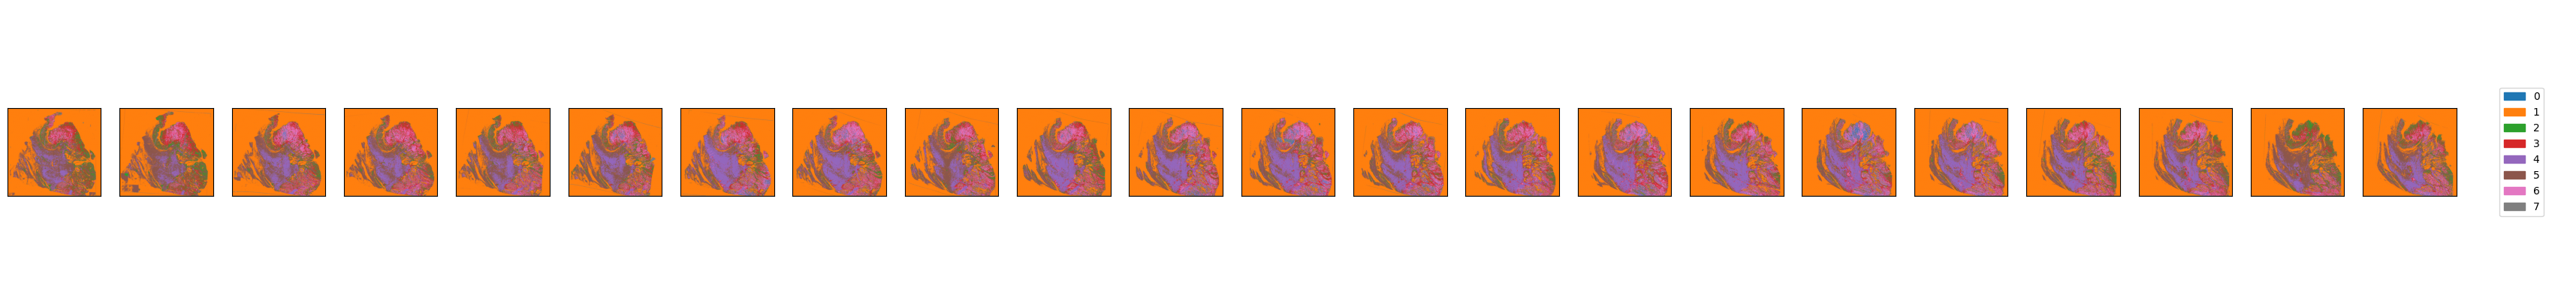

he 1


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 14 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 14 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 2

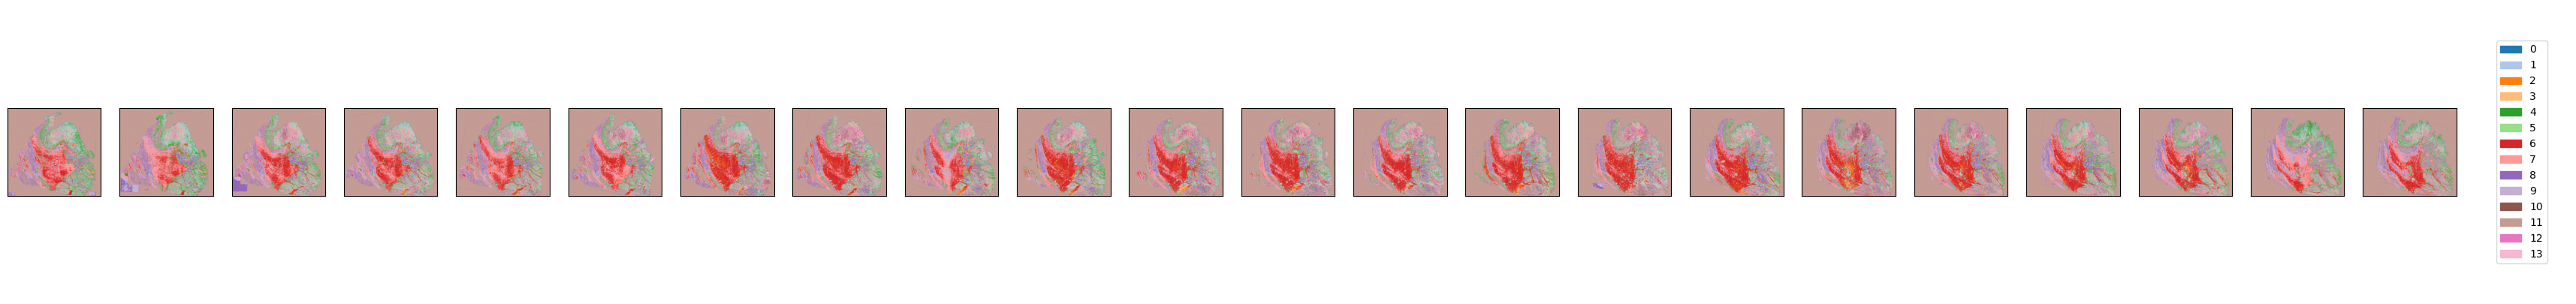

he 2


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 14 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 14 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 2

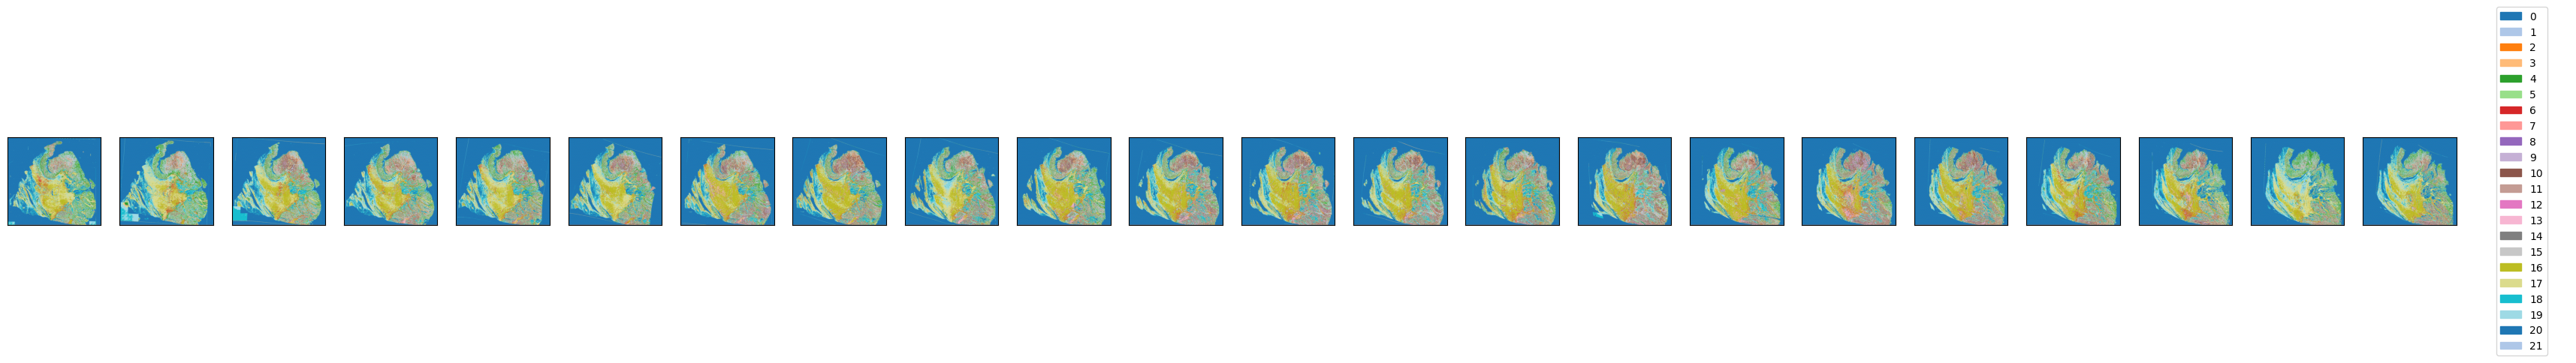

multiplex 0


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 12 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 12 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26]
INFO:fontTools.subset:Closing g

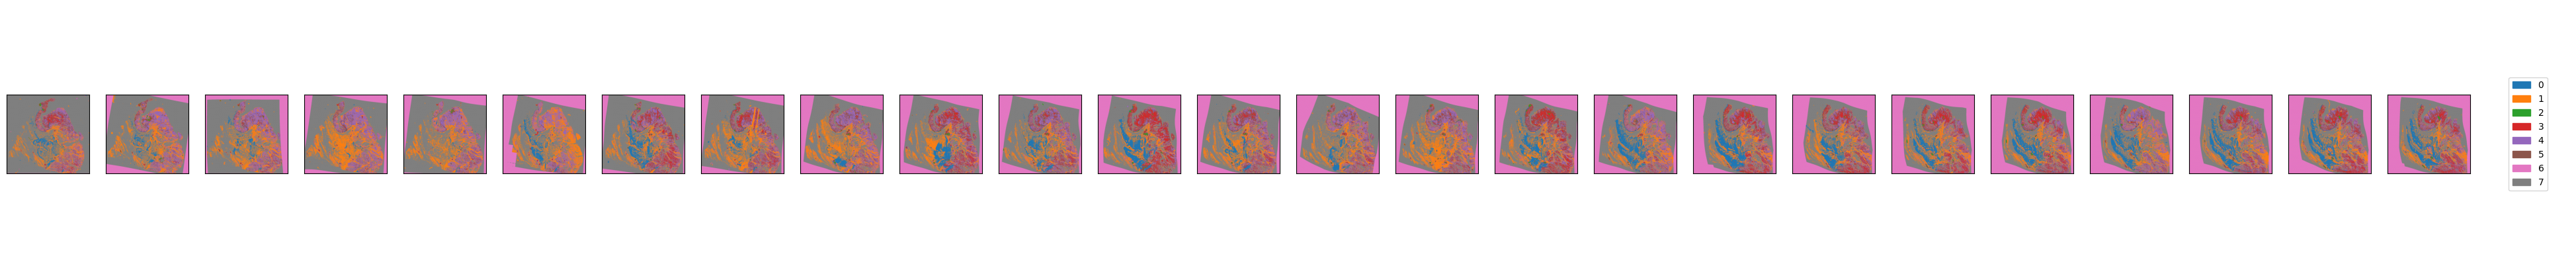

multiplex 1


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 14 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 14 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 2

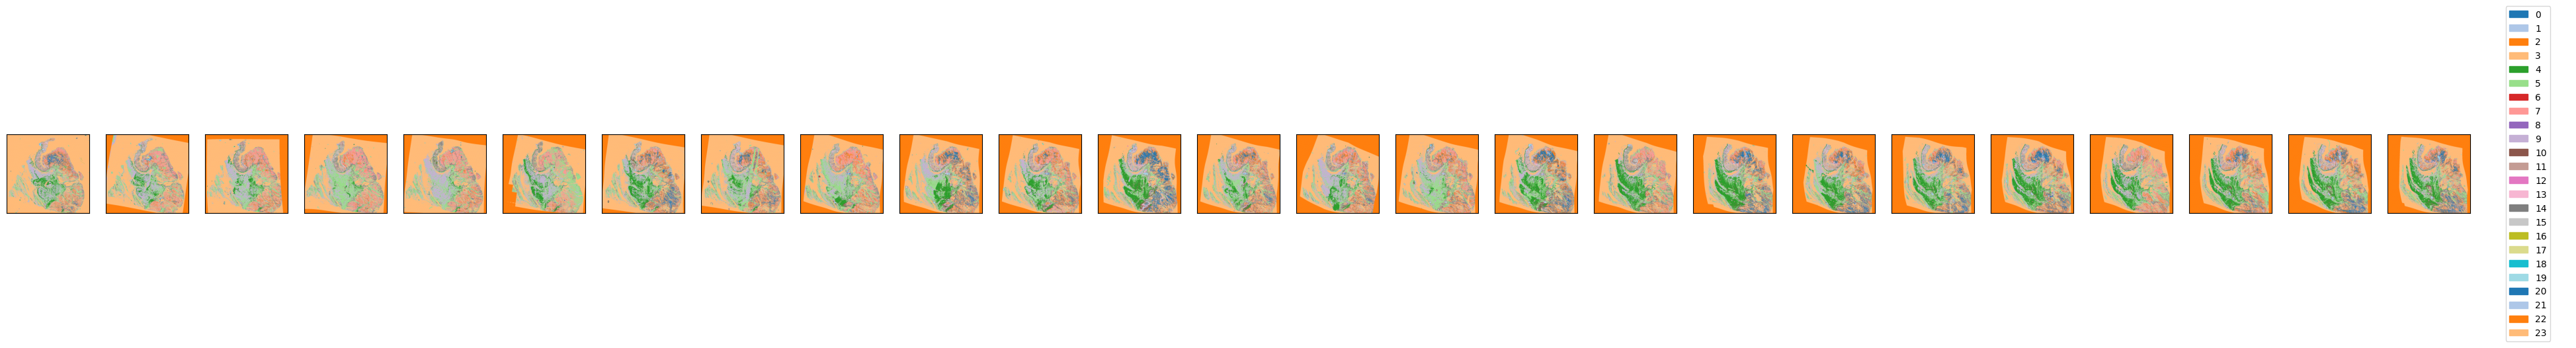

multiplex 2


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 14 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 14 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 2

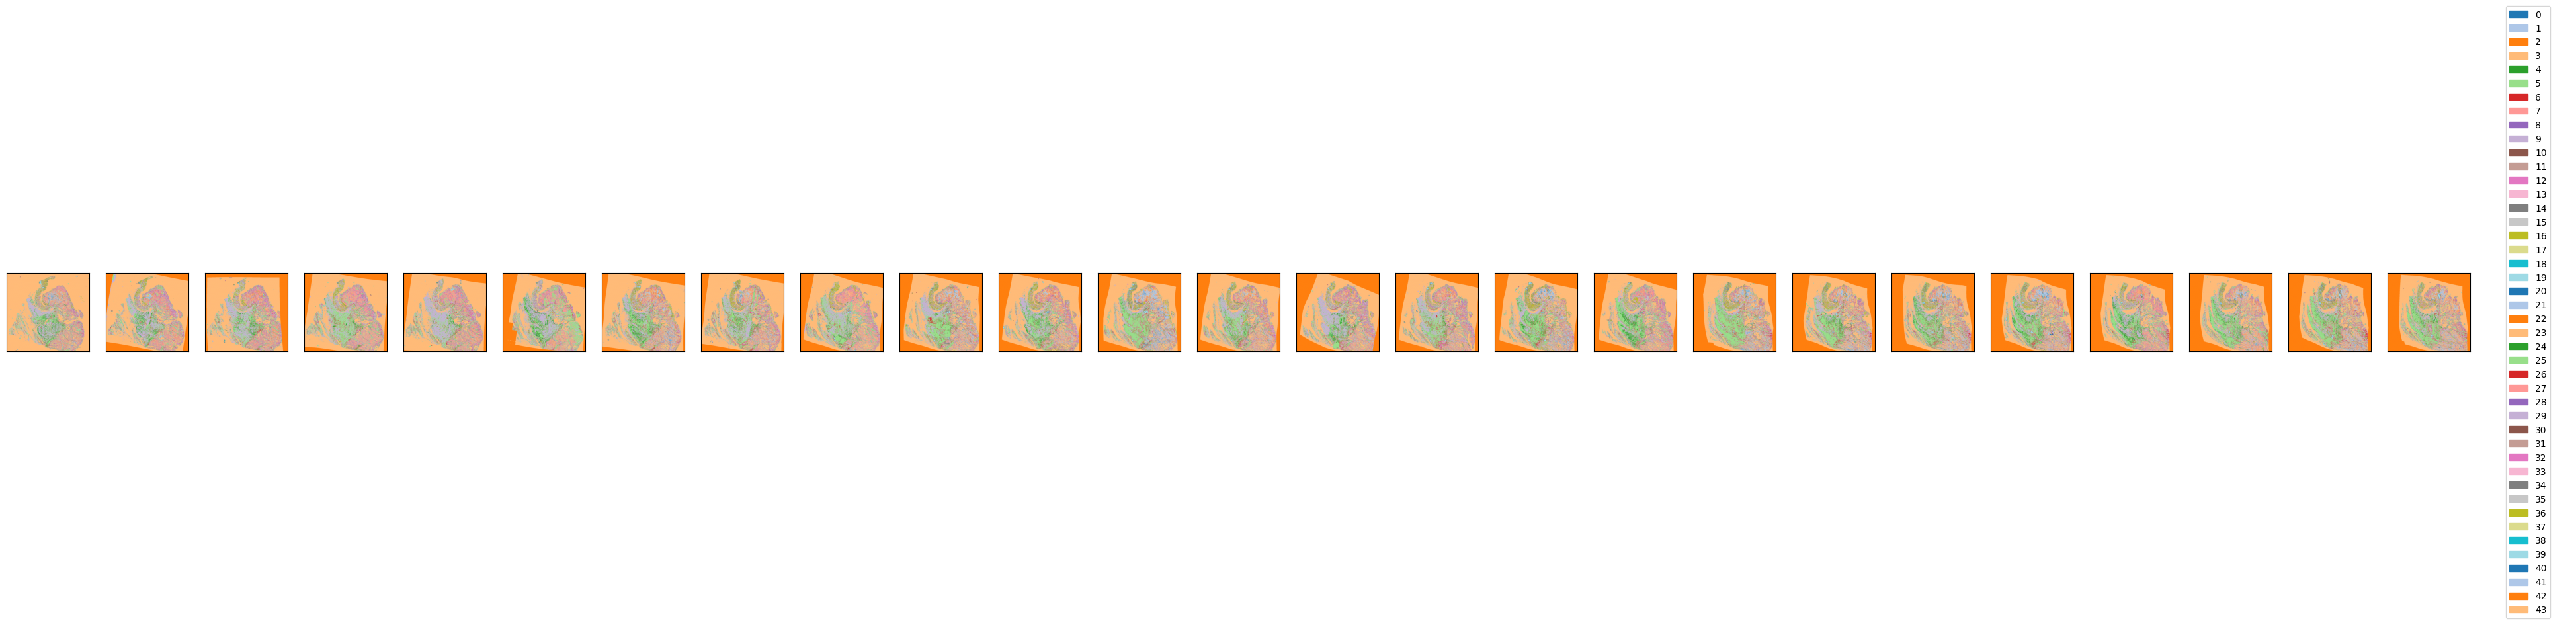

In [27]:
for dtype in mushroom.dtypes:
    for level in range(mushroom.num_levels):
        print(dtype, level)
        mushroom.display_clusters(dtype, level=level)
        plt.savefig(os.path.join(fig_dir, f'nbhds_{dtype}_l{level}.pdf'), dpi=300)
        plt.show()

INFO:root:generating volume for he spore


0


INFO:root:generating volume for multiplex spore
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 13 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'e', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'p', 'space', 't', 'u', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 72, 75, 76, 79, 80, 83, 87, 88, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 13 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'e', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'p', 'space', 't', 'u', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 72, 75, 76, 79, 80, 83, 87, 88, 91]
INFO:fontTo

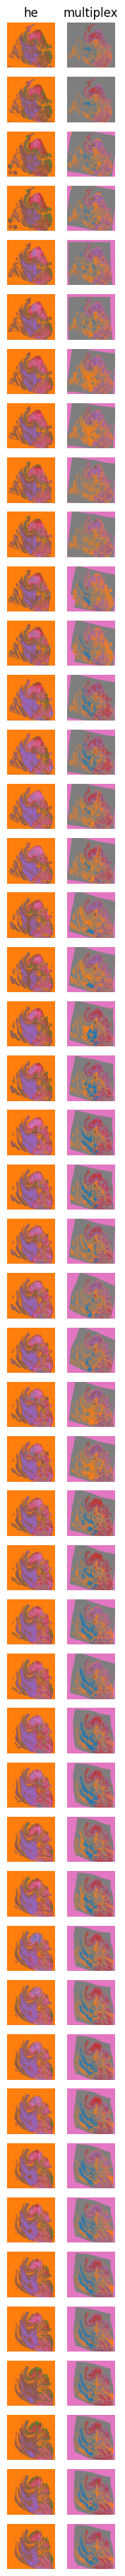

INFO:root:generating volume for he spore


1


INFO:root:generating volume for multiplex spore
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 13 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'e', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'p', 'space', 't', 'u', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 72, 75, 76, 79, 80, 83, 87, 88, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 13 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'e', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'p', 'space', 't', 'u', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 72, 75, 76, 79, 80, 83, 87, 88, 91]
INFO:fontTo

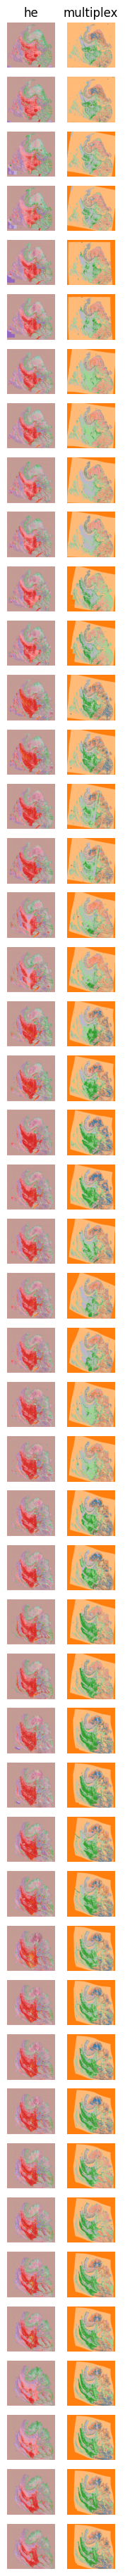

INFO:root:generating volume for he spore


2


INFO:root:generating volume for multiplex spore
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 13 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'e', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'p', 'space', 't', 'u', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 72, 75, 76, 79, 80, 83, 87, 88, 91]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 13 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'e', 'h', 'i', 'l', 'm', 'nonmarkingreturn', 'p', 'space', 't', 'u', 'x']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 72, 75, 76, 79, 80, 83, 87, 88, 91]
INFO:fontTo

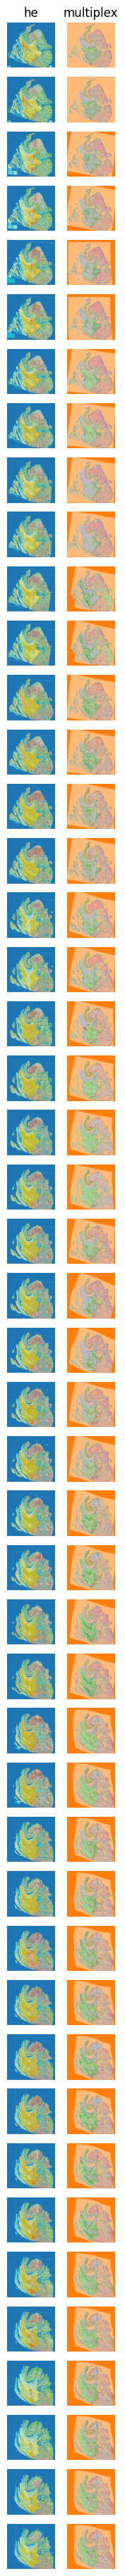

In [32]:
for level, cluster_res in enumerate(cluster_resolutions):
    print(level)
    dtype_to_volume = mushroom.generate_interpolated_volumes(
        z_scaler=z_scaler, level=level, integrate=False, dtype_to_weight=dtype_to_weight, resolution=cluster_res)
    dtype_to_volume_labels = {k:v.argmax(-1) if k != 'integrated' else v for k, v in dtype_to_volume.items()}
    
    mushroom.display_volumes(dtype_to_volume=dtype_to_volume_labels, positions=mushroom.section_positions)
    
    plt.savefig(os.path.join(fig_dir, f'nbhd_volumes_l{level}.pdf'), dpi=300)
    plt.show()
    
    outs = {
        'probs': dtype_to_volume,
        'labeled': dtype_to_volume_labels
    }
    pickle.dump(outs, open(os.path.join(out_dir, f'nbhd_volumes_l{level}.pkl'), 'wb'), protocol=4)
#     np.save(os.path.join(out_dir, f'nbhd_volumes_l{level}.npy'), {
#         'probs': dtype_to_volume,
#         'labeled': dtype_to_volume_labels
#     })
    
    del(dtype_to_volume)
    del(dtype_to_volume_labels)

In [33]:
fig_dir

'/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/mushroom/figures'

In [35]:
mushroom.save()

INFO:root:saving config and outputs to /diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/WD-76845/mushroom
INFO:root:no integrated clusters found


In [36]:
clustering_params = {
    'z_scaler': z_scaler,
    'cluster_resolutions': cluster_resolutions,
    'dtype_to_weight': dtype_to_weight
}
yaml.safe_dump(clustering_params, open(os.path.join(out_dir, 'nbhd_volume_params.yaml'), 'w'))

In [22]:
# new = Mushroom.from_config('/data/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/mushroom')


In [23]:
# mushroom.display_clusters('he', level=0)